In [1]:
from keras.datasets import imdb
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

### Download and view data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 95s 5us/step


In [3]:
word_index = imdb.get_word_index()
word_index_rev = {v:k for k,v in word_index.items()}
''.join([word_index_rev[w-3]+' ' for w in train_data[0] if w > 2])

1646592/1641221 [==============================] - 4s 2us/step


"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boy's that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole 

### Prepare the data with one hot encoding

In [4]:
def vectorize_word_list(word_list, dim=10000):
  results = np.zeros((len(word_list), dim)) # samples x 10000 words
  for i, word in enumerate(word_list):
    results[i, word] = 1 # note we passed a list as the second axis
  return results

X_train = vectorize_word_list(train_data)
X_test = vectorize_word_list(test_data)
X_train.shape

(25000, 10000)

In [5]:
y_train = np.asarray(train_labels.astype('float32'))
y_test = np.asarray(test_labels.astype('float32'))

### Building the network

In [6]:
model = models.Sequential()

# input_shape is the number of features
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Create Validation Set
Recall we have 25K samples, lets set aside 10K for validation

In [7]:
X_val= X_train[:10000]
partial_X_train = X_train[10000:] # remove validation samples from training set
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Run the model!

In [12]:
NUM_EPOCHS=20
history = model.fit(partial_X_train, partial_y_train,
                    epochs=NUM_EPOCHS,  batch_size=512,
                    validation_data=(X_val, y_val))

### View Results

In [14]:
hist = history.history
hist.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

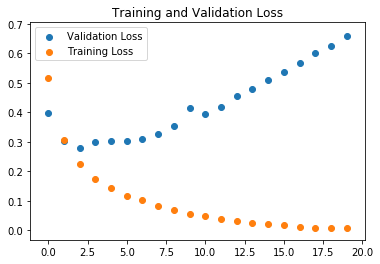

In [22]:
plt.scatter(range(NUM_EPOCHS), hist['val_loss'], label='Validation Loss')
plt.scatter(range(NUM_EPOCHS), hist['loss'], label='Training Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

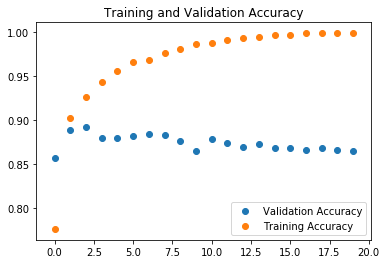

In [23]:
plt.scatter(range(NUM_EPOCHS), hist['val_accuracy'], label='Validation Accuracy')
plt.scatter(range(NUM_EPOCHS), hist['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Model overfits on the training set, try using fewer epochs

### Train another model
Using less epochs

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

NUM_EPOCHS=4
history = model.fit(partial_X_train, partial_y_train,
                    epochs=NUM_EPOCHS,  batch_size=512,
                    validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 180us/step - loss: 0.5567 - accuracy: 0.7611 - val_loss: 0.4202 - val_accuracy: 0.8592
Epoch 2/4
15000/15000 [==============================] - 2s 162us/step - loss: 0.3334 - accuracy: 0.9011 - val_loss: 0.3234 - val_accuracy: 0.8853
Epoch 3/4
15000/15000 [==============================] - 2s 161us/step - loss: 0.2389 - accuracy: 0.9273 - val_loss: 0.2821 - val_accuracy: 0.8924
Epoch 4/4
15000/15000 [==============================] - 2s 160us/step - loss: 0.1829 - accuracy: 0.9409 - val_loss: 0.2779 - val_accuracy: 0.8893


In [34]:
results = model.evaluate(X_test, y_test)
#model.predict(X_test)
results

25000/25000 [==============================] - 2s 84us/step


[0.295697540473938, 0.8802400231361389]